# 过拟合和欠拟合

过拟合(overfitting)指的是训练样本的得到的输出和期望输出基本一致，但是测试样本输出和测试样本的期望输出相差却很大 

欠拟合(underfitting)指的是模型在训练和预测时表现都不好的情况。

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

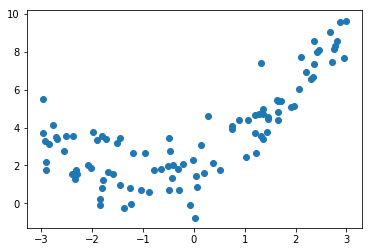

In [25]:
plt.scatter(x, y)
plt.show()

## 使用线性回归

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.49537078118650091

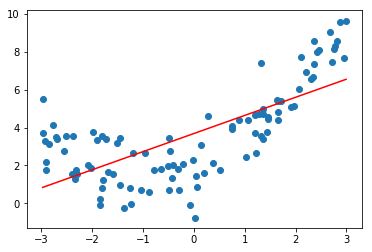

In [27]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [28]:
# 均方误差
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [30]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [31]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417858

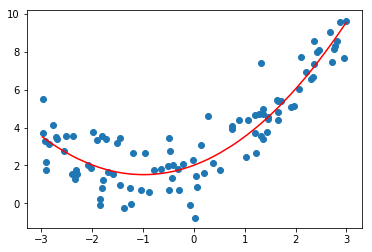

In [32]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [33]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.0508466763764153

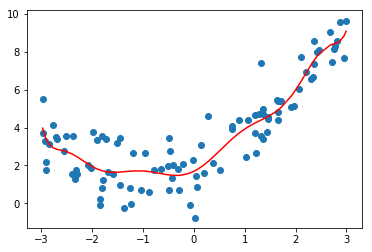

In [34]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [35]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.68728961485464657

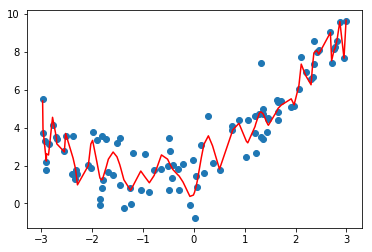

In [36]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

In [37]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

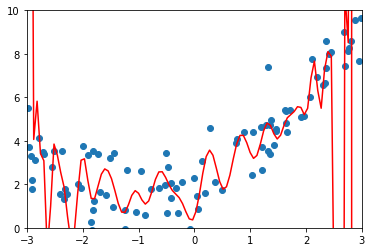

In [38]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

总结：随着degree的增加，呈现出过拟合的趋势。